In [1]:
import pandas as pd 

In [2]:
df = pd.read_excel('../data/Online Retail.xlsx')

In [3]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
clv_df = df[['InvoiceNo','InvoiceDate','UnitPrice','Quantity','CustomerID']]
clv_df.head(5)

,InvoiceNo,InvoiceDate,UnitPrice,Quantity,CustomerID
0,536365,2010-12-01 08:26:00,2.55,6,17850.0
1,536365,2010-12-01 08:26:00,3.39,6,17850.0
2,536365,2010-12-01 08:26:00,2.75,8,17850.0
3,536365,2010-12-01 08:26:00,3.39,6,17850.0
4,536365,2010-12-01 08:26:00,3.39,6,17850.0


In [5]:
clv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  datetime64[ns]
 2   UnitPrice    541909 non-null  float64       
 3   Quantity     541909 non-null  int64         
 4   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 20.7+ MB


- So looks like there are some null values in the CustomerID column and they need to be removed.
- There are records for cancelled orders too, their InvoiceNo is prefixed with a 'C', these records need to be deleted as these orders don't generate revenues.

In [6]:
clv_df = clv_df.dropna(subset = ['CustomerID'])
clv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   UnitPrice    406829 non-null  float64       
 3   Quantity     406829 non-null  int64         
 4   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 18.6+ MB


In [7]:
# Checking InvoiceNo
clv_df[clv_df['InvoiceNo'].astype(str).str.contains('C')]

,InvoiceNo,InvoiceDate,UnitPrice,Quantity,CustomerID
141,C536379,2010-12-01 09:41:00,27.50,-1,14527.0
154,C536383,2010-12-01 09:49:00,4.65,-1,15311.0
235,C536391,2010-12-01 10:24:00,1.65,-12,17548.0
236,C536391,2010-12-01 10:24:00,0.29,-24,17548.0
237,C536391,2010-12-01 10:24:00,0.29,-24,17548.0
...,...,...,...,...,...
540449,C581490,2011-12-09 09:57:00,0.83,-11,14397.0
541541,C581499,2011-12-09 10:28:00,224.69,-1,15498.0
541715,C581568,2011-12-09 11:57:00,10.95,-5,15311.0
541716,C581569,2011-12-09 11:58:00,1.25,-1,17315.0


In [8]:
clv_df = clv_df[~clv_df['InvoiceNo'].astype(str).str.contains('C')]
clv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   InvoiceDate  397924 non-null  datetime64[ns]
 2   UnitPrice    397924 non-null  float64       
 3   Quantity     397924 non-null  int64         
 4   CustomerID   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 18.2+ MB


In [9]:
clv_df[clv_df['InvoiceNo'].astype(str).str.contains('C')]

,InvoiceNo,InvoiceDate,UnitPrice,Quantity,CustomerID


We also need to make sure that the 'Quantity' and 'UnitPrice' are non-negative, they will be used in revenue calculation.

In [10]:
# check whether UnitPrice and Quantity are positive 
clv_df[(clv_df['Quantity'] <= 0) | (clv_df['UnitPrice'] <= 0)]

,InvoiceNo,InvoiceDate,UnitPrice,Quantity,CustomerID
9302,537197,2010-12-05 14:02:00,0.0,1,12647.0
33576,539263,2010-12-16 14:36:00,0.0,4,16560.0
40089,539722,2010-12-21 13:45:00,0.0,10,14911.0
47068,540372,2011-01-06 16:41:00,0.0,24,13081.0
47070,540372,2011-01-06 16:41:00,0.0,24,13081.0
56674,541109,2011-01-13 15:10:00,0.0,1,15107.0
86789,543599,2011-02-10 13:08:00,0.0,16,17560.0
130188,547417,2011-03-23 10:25:00,0.0,36,13239.0
139453,548318,2011-03-30 12:45:00,0.0,5,13113.0
145208,548871,2011-04-04 14:42:00,0.0,2,14410.0


So we don't have non-positive 'Quantity' values but we got many UnitPrice = 0.0 records, they also need to be removed. No revenue generated and it falsely deflates customer value.
Also, they often indicate:
- Free samples
- Data entry issues
- Missing prices
- System/test transactions

In [11]:
clv_df = clv_df[clv_df['UnitPrice'] > 0]
clv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   InvoiceDate  397884 non-null  datetime64[ns]
 2   UnitPrice    397884 non-null  float64       
 3   Quantity     397884 non-null  int64         
 4   CustomerID   397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 18.2+ MB


In [12]:
# Last check whether InvoiceNo and CustomerID are numeric or not
clv_df[~clv_df['InvoiceNo'].astype(str).str.isnumeric()] # non-numeric InvoicNo

,InvoiceNo,InvoiceDate,UnitPrice,Quantity,CustomerID


In [13]:
clv_df['CustomerID'].dtype # dtype CustomerID

dtype('float64')

So now we can perform some **CLV** specific trsanformations. 
For CLV analysis we require the revenue per transaction, the transaction (or order) is the basic unit of analysis, not the individual products within it. So, for some specific InvoiceNo = '56325', having three records in 'clv_df' corresponding to three different orders have to be clubbed into one.

In [14]:
clv_df['Revenue'] = clv_df['Quantity']*clv_df['UnitPrice']   # creating the revenue column

# aggregating transaction level revenue
clv_df = clv_df.groupby(['CustomerID','InvoiceNo','InvoiceDate'])['Revenue'].sum().reset_index()
clv_df

,CustomerID,InvoiceNo,InvoiceDate,Revenue
0,12346.0,541431,2011-01-18 10:01:00,77183.60
1,12347.0,537626,2010-12-07 14:57:00,711.79
2,12347.0,542237,2011-01-26 14:30:00,475.39
3,12347.0,549222,2011-04-07 10:43:00,636.25
4,12347.0,556201,2011-06-09 13:01:00,382.52
...,...,...,...,...
18557,18283.0,579673,2011-11-30 12:59:00,223.61
18558,18283.0,580872,2011-12-06 12:02:00,208.00
18559,18287.0,554065,2011-05-22 10:39:00,765.28
18560,18287.0,570715,2011-10-12 10:23:00,1001.32


The above dataframe is what we need as an input to the CLV model. Now we need to create three important metric columns:
1. Recency(R) : How recently a customer made a purchase?
2. Frequency(F) : How often are these purchases made?
3. Monetary(M) : How much money they spent ?

In [15]:
from lifetimes.utils import summary_data_from_transaction_data as summary 

In [16]:
reference_date = clv_df['InvoiceDate'].max() + pd.Timedelta(days=10)
reference_date

Timestamp('2011-12-19 12:50:00')

In [17]:
sf = summary(clv_df,'CustomerID','InvoiceDate',observation_period_end=reference_date,freq='D').reset_index()
sf 

,CustomerID,frequency,recency,T
0,12346.0,0.0,0.0,335.0
1,12347.0,6.0,365.0,377.0
2,12348.0,3.0,283.0,368.0
3,12349.0,0.0,0.0,28.0
4,12350.0,0.0,0.0,320.0
...,...,...,...,...
4333,18280.0,0.0,0.0,287.0
4334,18281.0,0.0,0.0,190.0
4335,18282.0,1.0,119.0,136.0
4336,18283.0,13.0,334.0,347.0


In [18]:
mf = clv_df.groupby('CustomerID')['Revenue'].mean().reset_index()
mf = mf.rename(columns={'Revenue' : 'monetary_value'})
clv_df = mf.merge(sf,on = 'CustomerID')
clv_df

,CustomerID,monetary_value,frequency,recency,T
0,12346.0,77183.600000,0.0,0.0,335.0
1,12347.0,615.714286,6.0,365.0,377.0
2,12348.0,449.310000,3.0,283.0,368.0
3,12349.0,1757.550000,0.0,0.0,28.0
4,12350.0,334.400000,0.0,0.0,320.0
...,...,...,...,...,...
4333,18280.0,180.600000,0.0,0.0,287.0
4334,18281.0,80.820000,0.0,0.0,190.0
4335,18282.0,89.025000,1.0,119.0,136.0
4336,18283.0,130.930000,13.0,334.0,347.0


In [19]:
clv_df[clv_df['frequency'] == 0]

,CustomerID,monetary_value,frequency,recency,T
0,12346.0,77183.60,0.0,0.0,335.0
3,12349.0,1757.55,0.0,0.0,28.0
4,12350.0,334.40,0.0,0.0,320.0
6,12353.0,89.00,0.0,0.0,214.0
7,12354.0,1079.40,0.0,0.0,242.0
...,...,...,...,...,...
4330,18276.0,335.86,0.0,0.0,53.0
4331,18277.0,110.38,0.0,0.0,68.0
4332,18278.0,173.90,0.0,0.0,83.0
4333,18280.0,180.60,0.0,0.0,287.0


🔹 1. BetaGeoFitter — Predicts future transactions
Based on how often someone bought (frequency)

When they last bought (recency)

And how long we observed them (T)

💡 It tells you:
“How likely is this customer to buy again in the next X days?”

It’s purely behavioral — doesn't care how much they spent.

✅ Used to forecast number of future purchases.

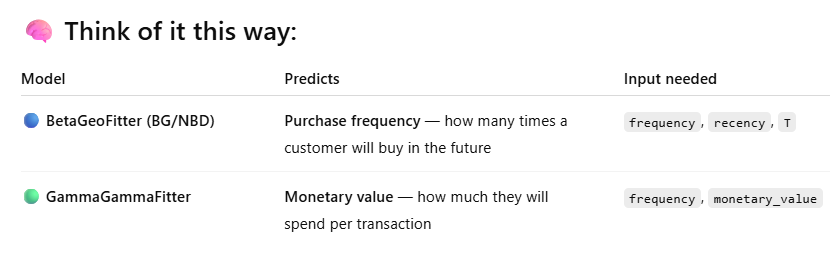

penaliser coefficient: It’s a regularization parameter that helps prevent overfitting when fitting the probabilistic models.

In [20]:
from lifetimes import BetaGeoFitter

In [21]:
# for p in [0.01, 0.1, 0.5, 1.0]:
#     try:
#         bgf = BetaGeoFitter(penalizer_coef=p)
#         bgf.fit(frequency, recency, T)
#         print(f"Penalizer {p} → Log-likelihood: {-bgf._negative_log_likelihood_:.2f}")
#     except:
#         print(f"Penalizer {p} → Did not converge")


In [22]:
# predicting the no. of transactions a customer will made in the future
bgf = BetaGeoFitter(penalizer_coef=0.1)
bgf.fit(clv_df['frequency'],clv_df['recency'],clv_df['T'])

<lifetimes.BetaGeoFitter: fitted with 4338 subjects, a: 0.00, alpha: 52.11, b: 0.00, r: 0.59>

In [23]:
# predicting the avg monetary value of future orders
from lifetimes import GammaGammaFitter

In [24]:
returning = clv_df[clv_df['frequency'] > 0]
returning

,CustomerID,monetary_value,frequency,recency,T
1,12347.0,615.714286,6.0,365.0,377.0
2,12348.0,449.310000,3.0,283.0,368.0
5,12352.0,313.255000,6.0,260.0,306.0
9,12356.0,937.143333,2.0,303.0,335.0
11,12358.0,584.030000,1.0,149.0,160.0
...,...,...,...,...,...
4327,18272.0,513.096667,5.0,244.0,256.0
4328,18273.0,68.000000,2.0,255.0,267.0
4335,18282.0,89.025000,1.0,119.0,136.0
4336,18283.0,130.930000,13.0,334.0,347.0


In [25]:
ggf = GammaGammaFitter(penalizer_coef = 0.1)
ggf.fit(returning['frequency'],returning['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 1.03, q: 0.18, v: 0.93>

<Axes: xlabel='monetary_value', ylabel='Density'>

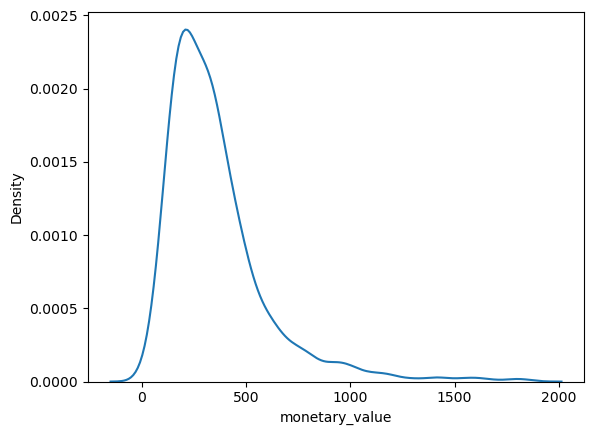

In [37]:
threshold = returning['monetary_value'].quantile(0.99)
cleaned = returning[returning['monetary_value'] < threshold]
ggf = GammaGammaFitter(penalizer_coef=0.1)
ggf.fit(cleaned['frequency'], cleaned['monetary_value'])
import seaborn as sns
sns.kdeplot(cleaned['monetary_value'])



From the available values we can see that $q<1$, that would mean <br>
$Mean = \dfrac{v*p}{q-1}$  , <br>
is negative,which is not poossible. <br>
This usually happens due to outlier values present,which is generally in every online retail data. You can aslo check the predicted CLV values from inbuilt functions in GammaGammaFitter,which will be negatives for certain customers. Let us see that..

In [30]:
ggf.customer_lifetime_value(
    bgf,
    returning['frequency'],
    returning['recency'],
    returning['T'],
    returning['monetary_value'],
    time = 12,
    discount_rate=0.1,
    freq='D'
).to_frame()

,clv
1,2229.236600
2,1069.212327
5,1359.357224
9,2130.719799
11,4401.634797
...,...
4327,2264.203358
4328,188.743273
4335,763.251533
4336,971.326185


In [26]:
import matplotlib.pyplot  as plt 

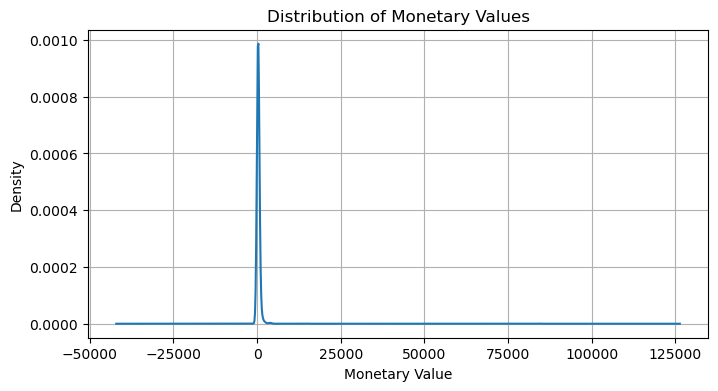

In [27]:
returning['monetary_value'].plot(kind='density',figsize=(8,4))
plt.title('Distribution of Monetary Values')
plt.grid()
plt.xlabel('Monetary Value');

A highly skewed distribution. There are two ways people take after this:
1. Remove outlier and try until they get the fit 
2. Use the raw monetary value,and this also end up working usually as we are more interested in number of future transactions.

So , for now we will go ahead with the second option.

In [29]:
from lifetimes.utils import _customer_lifetime_value

_customer_lifetime_value(
    bgf,
    clv_df['frequency'],
    clv_df['recency'],
    clv_df['T'],
    clv_df['monetary_value'],
    time = 14,
    discount_rate=0.1,
    freq='D'
).to_frame()

c:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,clv
0,25997.027798
1,2089.739506
2,848.540292
3,NaN
4,117.173168
...,...
4333,69.440184
4334,NaN
4335,166.300634
4336,985.288151


In [ ]:
def eS